In [62]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/Traveldata_train.csv'
travel = pd.read_csv(path)
travel.shape

(94379, 9)

In [4]:
travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [5]:
path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/surveydata_train.csv'
survey = pd.read_csv(path)
survey.shape

(94379, 17)

In [6]:
survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


# merging data

In [7]:
df = travel.merge(survey, how='outer', on='ID', indicator=True)
df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,_merge
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,both
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,both
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,both
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,both
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,both


In [8]:
df.shape

(94379, 26)

In [9]:
df._merge.value_counts()

both          94379
left_only         0
right_only        0
Name: _merge, dtype: int64

The dataframes were merged perfectly. The datasets have the same unique IDs each.

We can proceed to work with only one df.

# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94302 non-null  object  
 2   Customer_Type            85428 non-null  object  
 3   Age                      94346 non-null  float64 
 4   Type_Travel              85153 non-null  object  
 5   Travel_Class             94379 non-null  object  
 6   Travel_Distance          94379 non-null  int64   
 7   Departure_Delay_in_Mins  94322 non-null  float64 
 8   Arrival_Delay_in_Mins    94022 non-null  float64 
 9   Overall_Experience       94379 non-null  int64   
 10  Seat_Comfort             94318 non-null  object  
 11  Seat_Class               94379 non-null  object  
 12  Arrival_Time_Convenient  85449 non-null  object  
 13  Catering                 85638 non-null  object  
 14  Platfo

**The numeric columns are:** 
* 'ID',
* 'Age',
* 'Travel_Distance',
* 'Departure_Delay_in_Mins',
* 'Arrival_Delay_in_Mins',
* 'Overall_Experience'

**The categorical columns are:**
* 'Gender',
* 'Customer_Type',
* 'Type_Travel',
* 'Travel_Class',
* 'Seat_Comfort',
* 'Seat_Class',
* 'Arrival_Time_Convenient',
* 'Catering',
* 'Platform_Location',
* 'Onboard_Wifi_Service',
* 'Onboard_Entertainment',
* 'Online_Support',
* 'Ease_of_Online_Booking',
* 'Onboard_Service',
* 'Legroom',
* 'Baggage_Handling',
* 'CheckIn_Service',
* 'Cleanliness',
* 'Online_Boarding'

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


* **ID**: We don't care about this columns since it's unique for each entry.
* **Age**: Seems alright. Range is from 7-85 years.
* **Travel_Distance**: right skewed?
* **Departure_Delay_in_Mins**: right skewed. Max value is 1592 mins ~ 26 hours. What's up with that?
* **Arrival_Delay_in_Mins**: right skewed. Max value is 1592 mins ~ 26 hours. What's up with that?
* **Overall_Experience**: is the target variable so we're not interested. The dataset is balanced since the mean value is 0.54, meaning that 54% of the targets are 1s.

In [12]:
df.describe(include='object')

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,94302,85428,85153,94379,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,2,2,2,2,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business Travel,Eco,Acceptable,Green Car,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,47815,69823,58617,49342,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533


* **'Gender'**:
* **'Customer_Type'**:
* **'Type_Travel'**:
* **'Travel_Class'**:
* **'Seat_Comfort'**:
* **'Seat_Class'**:
* **'Arrival_Time_Convenient'**:
* **'Catering'**:
* **'Platform_Location'**:
* **'Onboard_Wifi_Service'**:
* **'Onboard_Entertainment'**:
* **'Online_Support'**:
* **'Ease_of_Online_Booking'**:
* **'Onboard_Service'**:
* **'Legroom'**:
* **'Baggage_Handling'**:
* **'CheckIn_Service'**:
* **'Cleanliness'**:
* **'Online_Boarding'**:

In [13]:
num_cols = df.describe().columns.tolist()
cat_cols = df.describe(include='object').columns.tolist()

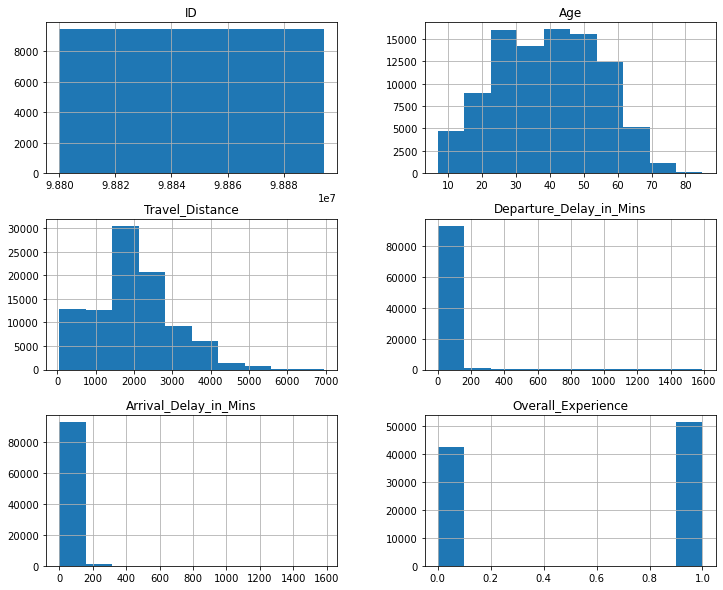

In [14]:
# showing numerical data
df[num_cols].hist(figsize=(12,10))
plt.show()

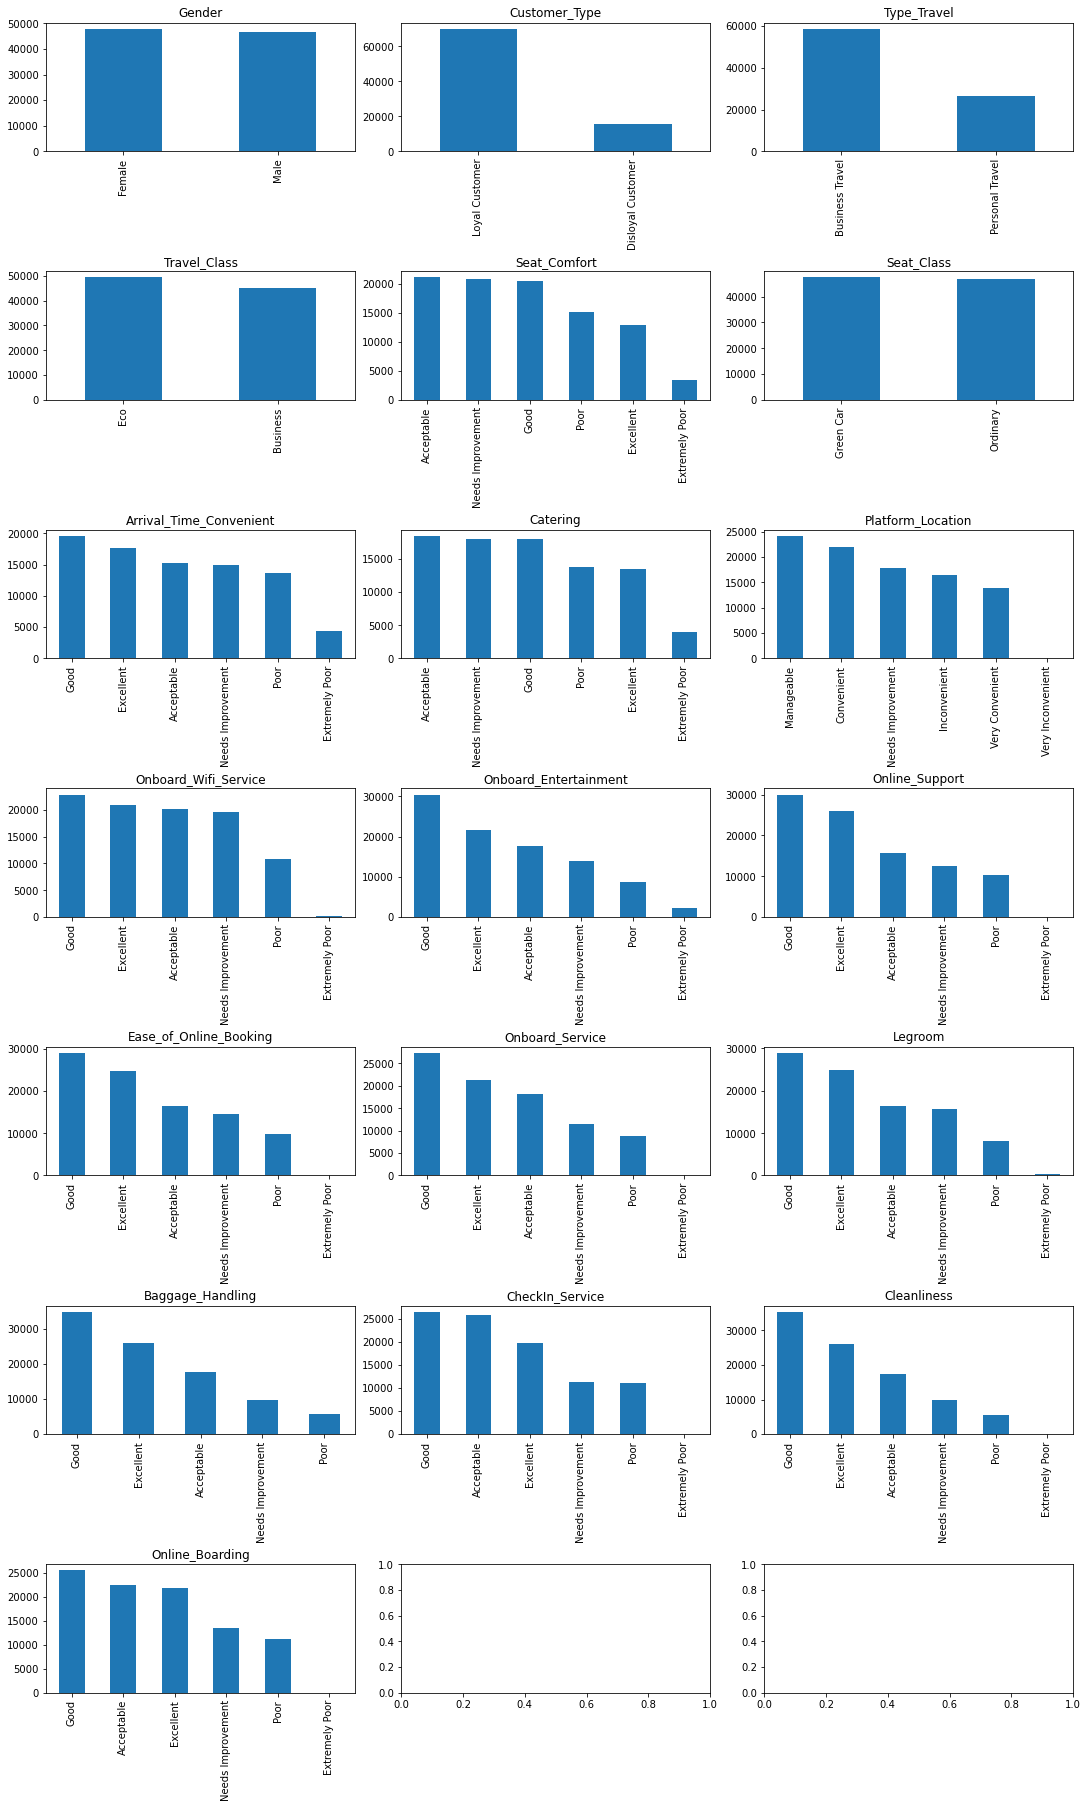

In [15]:
# assuming you have 12 columns:
fig,axes = plt.subplots(nrows=7, ncols=3, figsize=(15,25), constrained_layout=True)

# use `select_dtypes` to filter instead of `describe`
for col, ax in zip(df.select_dtypes(include='O'), axes.ravel()):
    df[col].value_counts().plot.bar(ax=ax)
    ax.set_title(col)
    
plt.show()

## dealing with missing values

<AxesSubplot:>

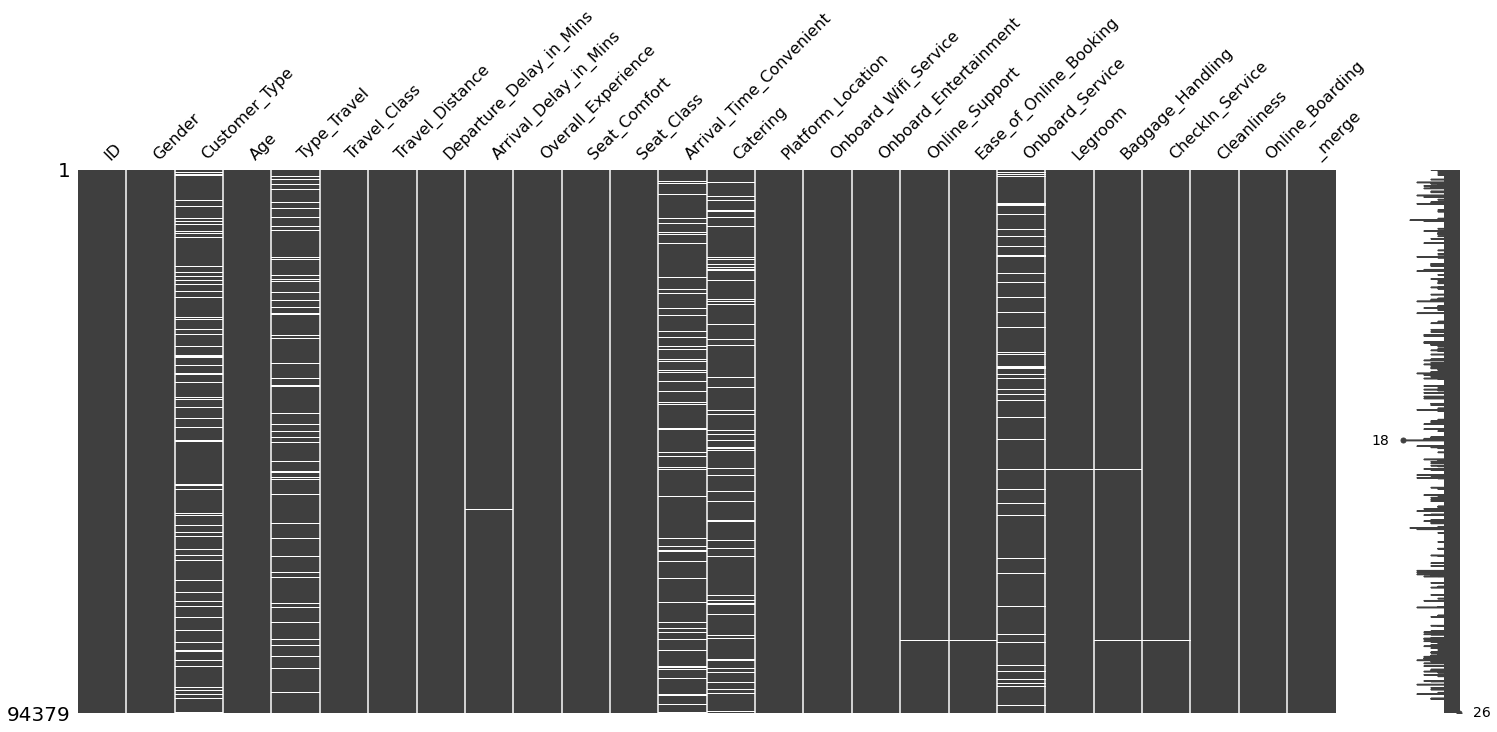

In [16]:
msno.matrix(df)

In [22]:
df.isna().sum().sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Arrival_Delay_in_Mins       357
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Gender                       77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Departure_Delay_in_Mins      57
Age                          33
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Boarding               6
Cleanliness                   6
ID                            0
Seat_Class                    0
Overall_Experience            0
Travel_Distance               0
Travel_Class                  0
_merge                        0
dtype: int64

In [54]:
nona_df = df.copy()

In [55]:
def fill_nas_with_mode(df, col):
    mode = df[col].mode().iloc[0]
    df[col].fillna(mode, inplace=True)

def fill_nas_with_median(df, col):
    median = df[col].median()
    df[col].fillna(median, inplace=True)

for col in cat_cols:
    fill_nas_with_mode(nona_df, col)

for col in num_cols:
    fill_nas_with_median(nona_df, col)

<AxesSubplot:>

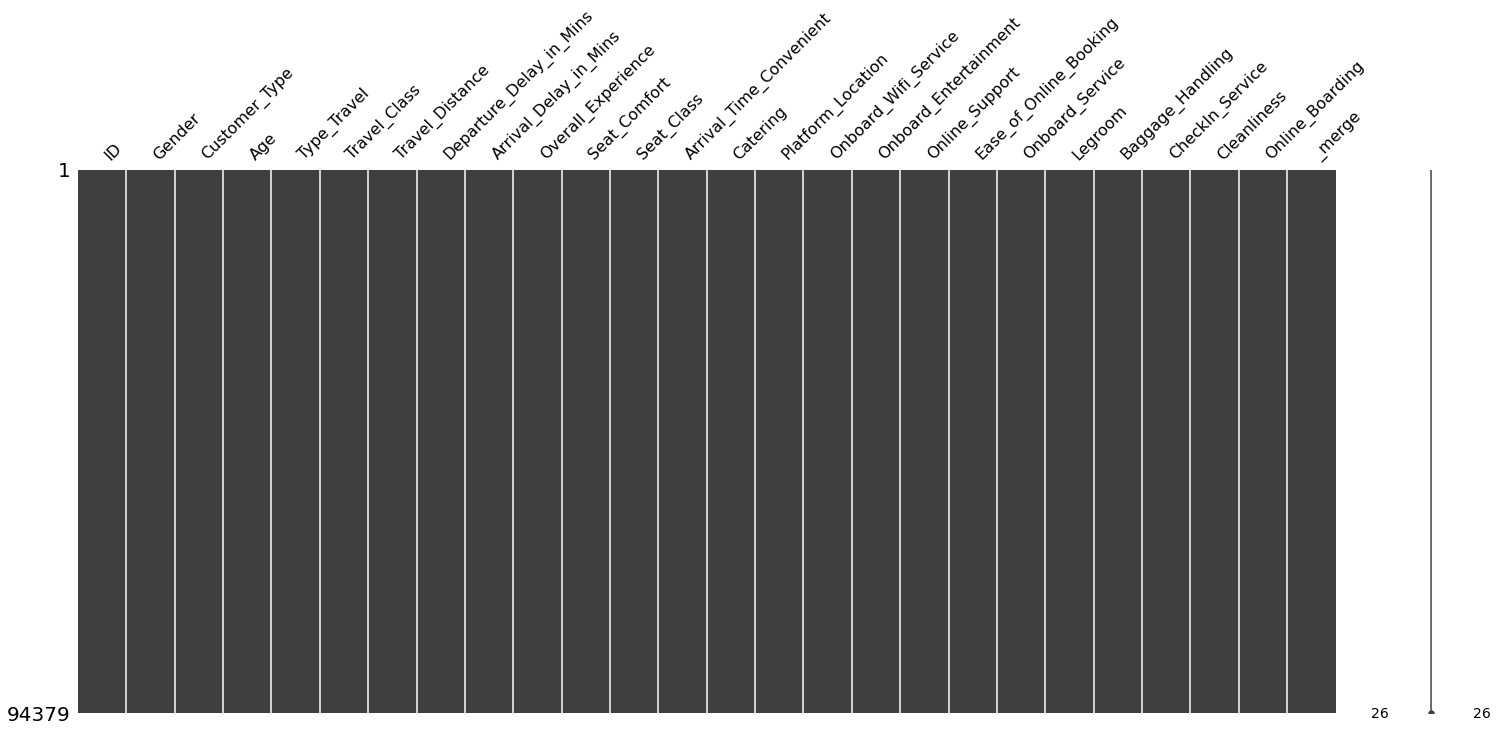

In [56]:
msno.matrix(nona_df)

In [57]:
nona_df.isna().sum().sort_values(ascending=False)

ID                         0
Gender                     0
Online_Boarding            0
Cleanliness                0
CheckIn_Service            0
Baggage_Handling           0
Legroom                    0
Onboard_Service            0
Ease_of_Online_Booking     0
Online_Support             0
Onboard_Entertainment      0
Onboard_Wifi_Service       0
Platform_Location          0
Catering                   0
Arrival_Time_Convenient    0
Seat_Class                 0
Seat_Comfort               0
Overall_Experience         0
Arrival_Delay_in_Mins      0
Departure_Delay_in_Mins    0
Travel_Distance            0
Travel_Class               0
Type_Travel                0
Age                        0
Customer_Type              0
_merge                     0
dtype: int64

## Dummy variables

In [58]:
nona_df.drop(columns=['ID','_merge'], inplace=True)

In [59]:
dumm_df = pd.get_dummies(nona_df, drop_first=True)

<AxesSubplot:>

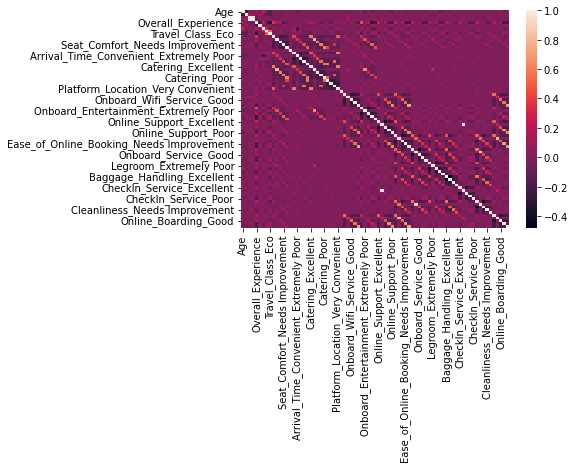

In [61]:
sns.heatmap(dumm_df.corr())

In [63]:
# scaling the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dumm_df), columns=dumm_df.columns)

In [67]:
scaled_df.corr()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,...,Cleanliness_Excellent,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
Age,1.000000,-0.251518,-0.007987,-0.010641,0.116212,0.005040,0.265036,-0.040190,-0.136799,0.012722,...,0.009594,0.006155,-0.021223,0.039844,0.015355,-0.001654,-0.012065,0.021681,-0.055048,-0.028347
Travel_Distance,-0.251518,1.000000,0.114078,0.110896,-0.041582,0.126043,-0.018999,-0.114299,-0.165618,-0.036040,...,-0.008232,0.015097,0.008770,-0.026168,-0.007942,0.004975,0.005250,0.013630,0.017710,-0.006388
Departure_Delay_in_Mins,-0.007987,0.114078,1.000000,0.958940,-0.073810,0.002216,-0.002844,-0.008244,0.007354,-0.027401,...,-0.040042,-0.002680,-0.031111,0.022218,0.040863,-0.010341,0.006145,-0.006757,0.017565,0.012184
Arrival_Delay_in_Mins,-0.010641,0.110896,0.958940,1.000000,-0.080027,0.000257,-0.004245,-0.008299,0.012299,-0.030321,...,-0.043165,-0.002835,-0.033397,0.023541,0.044180,-0.010741,0.005745,-0.008529,0.018944,0.013592
Overall_Experience,0.116212,-0.041582,-0.073810,-0.080027,1.000000,-0.214417,0.274699,-0.100799,-0.310013,0.357569,...,0.225863,-0.007993,0.060889,-0.097901,-0.069568,0.202169,-0.012383,0.129778,-0.217726,-0.210250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Online_Boarding_Excellent,-0.001654,0.004975,-0.010341,-0.010741,0.202169,-0.016668,0.028985,0.019083,-0.030523,0.140387,...,0.070372,-0.003982,0.013944,-0.037358,-0.019190,1.000000,-0.006170,-0.333236,-0.223048,-0.200351
Online_Boarding_Extremely Poor,-0.012065,0.005250,0.006145,0.005745,-0.012383,0.000168,0.005019,-0.007053,0.003248,-0.004501,...,-0.006963,-0.000082,-0.000980,-0.003840,0.001126,-0.006170,1.000000,-0.006869,-0.004597,-0.004130
Online_Boarding_Good,0.021681,0.013630,-0.006757,-0.008529,0.129778,-0.024396,0.062384,-0.019663,-0.055387,-0.013989,...,0.024863,-0.001157,-0.004245,0.003087,0.012957,-0.333236,-0.006869,1.000000,-0.248319,-0.223050
Online_Boarding_Needs Improvement,-0.055048,0.017710,0.017565,0.018944,-0.217726,0.046355,-0.078239,0.004926,0.088093,-0.064142,...,-0.061840,0.001197,-0.017460,0.025671,0.014224,-0.223048,-0.004597,-0.248319,1.000000,-0.149296
